In [222]:
#librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import seaborn as sns
import re
import random
from scipy.spatial.distance import cdist
#import pyclustertend 
import sklearn.preprocessing
from sklearn.decomposition import PCA


In [223]:
#cargar los datos
df = pd.read_csv("movies.csv", encoding="latin1")

# 1. Exploración de datos

In [224]:
#exploracion de los datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df.columns))

#resumen del set de datos
print("\n--Resumen del set de datos:--")
print(df.describe())



--Columnas:---
['id', 'budget', 'genres', 'homePage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime', 'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'title', 'originalLanguage', 'popularity', 'releaseDate', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

--Resumen del set de datos:--
                  id        budget       revenue       runtime    popularity  \
count   10000.000000  1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean   249876.829300  1.855163e+07  5.673793e+07    100.268100     51.393907   
std    257380.109004  3.662669e+07  1.495854e+08     27.777829    216.729552   
min         5.000000  0.000000e+00  0.000000e+00      0.000000      4.258000   
25%     12286.500000  0.000000e+00  0.000000e+00     90.000000     14.577750   
50%    152558.000000  5.000000e+05  1.631245e+05    10

In [225]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df.dtypes)
tipos_de_datos = df.dtypes.value_counts()
print('resumen:')
print(tipos_de_datos)



----Tipo de datos:---
id                             int64
budget                         int64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount               object
castMenAmount  

---
# 2. Tipo de variables 

### Variables:
1. Id: Id de la película 

2. popularity: Índice de popularidad de la película calculado semanalmente 

3. budget: El presupuesto para la película. 

4. revenue: El ingreso de la película. 

5. original_title: El título original de la película, en su idioma original. 

6. originalLanguage: Idioma original en que se encuentra la película 

7. title: El título de la película traducido al inglés 

8. homePage: La página de inicio de la película 

9. video: Si tiene videos promocionales o no 

10. director: Director de la película 

11. runtime: La duración de la película. 

12. genres: El género de la película. 

13. genresAmount: Cantidad de géneros que representan la película 

14. productionCompany: Las compañías productoras de la película. 

15. productionCoAmount: Cantidad de compañías productoras que participaron en la película 

16. productionCompanyCountry: Países de las compañías productoras de la película 

17. productionCountry: Países en los que se llevó a cabo la producción de la película 

18. productionCountriesAmount: Cantidad de países en los que se rodó la película 


19. releaseDate: Fecha de lanzamiento de la película 

20. voteCount: El número de votos en la plataforma para la película. 

21. voteAvg: El promedio de los votos en la plataforma para la película 


22. actors: Actores que participan en la película (Elenco) 

23. actorsPopularity: Índice de popularidad del elenco de la película. 

24. actorsCharacter: Personaje que interpreta cada actor en la película 

25. actorsAmount: Cantidad de personas que actúan en la película 

26. castWomenAmount: Cantidad de actrices en el elenco de la película 

27. castMenAmount: Cantidad de actores en el elenco de la película. 

## Tipo de Varibles
### Variables Cualitativas:
#### Ordinales:
- No hay
 
#### Nominales:
- original_title
- originalLanguage
- title
- homePage
- director
- genres
- productionCompany
- productionCompanyCountry
- productionCountry
- video
- actors
- actorsCharacter


### Variables Cuantitativas:
#### Continuas:
- popularity
- revenue
- voteAvg


#### Discretas:
- Id
- releaseDate
- budget
- runtime
- genresAmount
- productionCoAmount
- productionCountriesAmount
- voteCount
- actorsPopularity
- actorsAmount
- castWomenAmount
- castMenAmount


In [226]:
# revision de valores duplicados
print(df.duplicated().sum())

0


In [227]:
# eliminar valores nulos o llenarlos con la media
df = df.dropna()

#llenar los valores nulos de video
df['video'].fillna('FALSE', inplace=True)

#calcular la media de solo las columnas numericas
mean_values = df.select_dtypes(include=[np.number]).mean()

#reemplazar valores nulos con la media
df.fillna(mean_values, inplace=True)


C:\Users\angel\AppData\Local\Temp\ipykernel_46112\2643670234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video'].fillna('FALSE', inplace=True)


In [228]:
#convertir los tipos de datos
#convertir la columna video a numerica
df['video'] = df['video'].apply(lambda x: 1 if str(x).upper() == 'TRUE' else 0)

#convertir la columna releaseDate a datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

#convertir las columnas popularity, revenue y voteAvg a enteros
df['popularity'] = df['popularity'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['voteAvg'] = df['voteAvg'].astype(int)

#asegurarse que todas las variables sean de tipo int
df['castWomenAmount'] = df['castWomenAmount'].astype(int)
df['castMenAmount'] = df['castMenAmount'].astype(int)

#asegurarse que runtime no tenga valores negativos
df['runtime'] = df['runtime'].apply(lambda x: x if x > 0 else 0)
# df[df['runtime'] >= 0 ] #elimina los valores negativos
if (df['runtime'] < 0).any():
    print("Aún hay valores negativos en 'runtime'.")
else:
    print("Todos los valores negativos en 'runtime' han sido corregidos.")


Todos los valores negativos en 'runtime' han sido corregidos.


In [229]:
#limpiar los datos de la populariadad de actores
# Eliminar caracteres no numerricos y convertir a float e ignorar los nombres
def clean_popularity(popularity_list):
    numeric_values = []
    for value in popularity_list:
        try:
            numeric_values.append(float(re.sub(r'\D', '', value)))
        except ValueError:
            pass  # ignorar los xd
    return numeric_values

df['actorsPopularity'] = df['actorsPopularity'].str.split('|').apply(clean_popularity)

#promedio de popularidad
df['actorsPopularity_avg'] = df['actorsPopularity'].apply(lambda x: sum(x) / len(x) if x else 0)
print((df['actorsPopularity_avg']))

0       10386.160000
10       2820.183099
11       5757.305556
14       5035.864865
16       8124.315789
            ...     
9955       41.800000
9968     1706.625000
9979     8349.208333
9982    13318.918919
9988     6537.390244
Name: actorsPopularity_avg, Length: 3507, dtype: float64


In [230]:
#limpiar tambien genero
df['genres'] = df['genres'].str.split('|')
print(df['genres'])

0                    [Crime, Comedy]
10      [Adventure, Fantasy, Action]
11                   [Action, Crime]
14                      [Drama, War]
16       [Animation, Comedy, Family]
                    ...             
9955           [War, History, Drama]
9968                [Romance, Drama]
9979            [Music, Documentary]
9982                   [Documentary]
9988                        [Comedy]
Name: genres, Length: 3507, dtype: object


In [231]:
#normalizacion de datos
#no se deben de normalizar todos los dato, entonces los de 
#nobmres de las columans que no se van a normalizar, porque no es necesario
#columans que si se van a normalizar
numeric_columns = ['actorsAmount', 'runtime']
print(numeric_columns)
#normalizar los datos
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())


['actorsAmount', 'runtime']
    id     budget                        genres  \
0    5    4000000               [Crime, Comedy]   
10  22  140000000  [Adventure, Fantasy, Action]   
11  24   30000000               [Action, Crime]   
14  28   31500000                  [Drama, War]   
16  35   75000000   [Animation, Comedy, Family]   

                                             homePage  \
0           https://www.miramax.com/movie/four-rooms/   
10  http://disney.go.com/disneyvideos/liveaction/p...   
11    http://www.miramax.com/movie/kill-bill-volume-1   
14                       http://www.apocalypsenow.com   
16                      http://www.simpsonsmovie.com/   

                                    productionCompany  \
0                                Miramax|A Band Apart   
10       Walt Disney Pictures|Jerry Bruckheimer Films   
11                               Miramax|A Band Apart   
14                   United Artists|American Zoetrope   
16  AKOM Production Company|Gracie Fi

---
# Clustering

1.1 Preprocesamiento del dataset.

    - Eliminar variables que no aportan información relevante.
    - describir las variables con las que se calcularan los grupos

### variables que no aportan información relevante:
- Id, original_title, title, homePage porque son identificadores unicos, por lo tanto no aportan información relevante para la agrupación.

- actors: actores que participan en la película (Elenco), no es un factor determinante para la agrupación.

- director: puede influir bastante en la película, pero puede llegar a ser muy granular para la agrupacion. Por la gran variedad de directores diferentes entonces se puede tener grupos muy pequeños y que no representen algo significativo.

- actorsCharacter, actorsAmount, castWomenAmount, castMenAmount: también puede influir bastante en la película, pero puede llegar a ser muy granular para la agrupación. Por la gran variedad entonces se puede tener grupos muy pequeños y que no representen algo significativo.

-  productionCompanyCountry, productionCountry, productionCoAmount, productionCountriesAmount: pueden influir bastante en la película, pero puede llegar a ser muy granular para la agrupación. Por la gran variedad entonces se puede tener grupos muy pequeños y que no representen algo significativo.

### Variables con las que se calcularan los grupos

Grupo seleccionado: caracteristica de peliculas existosas:
- budget, genre, runtime, revenue, voteAvg, voteCount, popularity, releaseDate, video, actorsPopularity, productionCompany



C:\Users\angel\AppData\Local\Temp\ipykernel_46112\1850393718.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop(['id', 'originalTitle', 'title', 'homePage', 'actors', 'director', 'actorsCharacter', 'actorsAmount', 'castWomenAmount', 'castMenAmount', 'productionCompanyCountry', 'productionCountry', 'productionCoAmount', 'productionCountriesAmount'], axis = 'columns' ).hist(ax=axs)


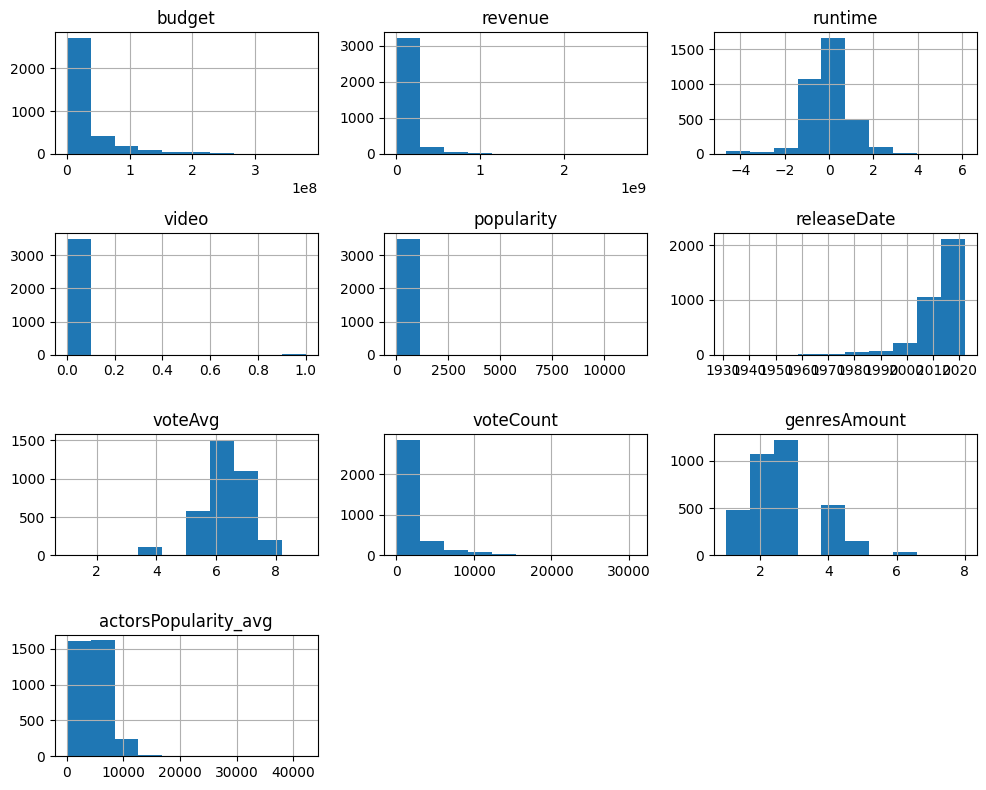

In [232]:
#eliminar variables que no aportan informacion relevante
fig, axs = plt.subplots( figsize=(10, 8))
df.drop(['id', 'originalTitle', 'title', 'homePage', 'actors', 'director', 'actorsCharacter', 'actorsAmount', 'castWomenAmount', 'castMenAmount', 'productionCompanyCountry', 'productionCountry', 'productionCoAmount', 'productionCountriesAmount'], axis = 'columns' ).hist(ax=axs)
plt.tight_layout()
plt.show()

Es importante notar que runtime, tiene datos negativos, porque estan normalizados, no es que existan minutos negativos.

------


### 2.2 Tendencia de agrupamiento

In [ ]:
#estadistico de hopkings
#separar los datos numericos
# numeric_columns = ['budget', 'popularity', 'runtime', 'revenue', 'voteAvg', 'voteCount', 'actorsPopularity_avg']
# numeric_columns = ['budget','popularity', 'video', 'voteAvg', 'voteCount', 'actorsPopularity_avg']
# numeric_columns = ['popularity', 'voteCount']
numeric_columns = ['budget', 'popularity', 'revenue']


num_df = df[numeric_columns]


def hopkins(X):
    n = len(X)
    m = int(0.1 * n) # m es el numero de puntos random
    nbrs = NearestNeighbors(n_neighbors=m).fit(X) #fitting de los puntos
    rand_indices = np.random.randint(0, n, size =m) #indices random
    rand_X = X.iloc[rand_indices] #puntos random

    #distancia a los vecinos mas cercanos
    nn_dist = nbrs.kneighbors(rand_X, 2, return_distance=True)[0][:, 1]

    #distancia a un punto random
    rand_X_dist = np.random.rand(m, X.shape[1])
    min_dist = np.min(cdist(X, rand_X_dist), axis=1)
    
    #Calculo de hopkins
    ujd = sum(nn_dist)
    wjd = sum(min_dist)
    H = ujd / (ujd + wjd)

    return H

#Aplicar el test de hopkins
valor_hopkins= hopkins(num_df)
print("El valor de Hopkins es: ", valor_hopkins)



El valor de Hopkins es:  0.0026346015080979087


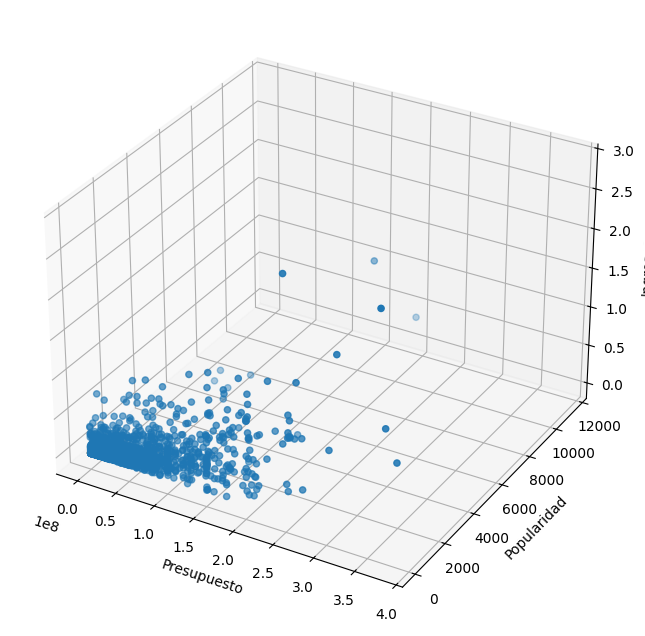

In [ ]:
# VAT
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(num_df)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(num_df['budget'], num_df['popularity'], num_df['revenue'])
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Popularidad')
ax.set_zlabel('Ingresos')

plt.show()

